# Arguments

In [1]:
# inceptionv3-ft-pv-self-eb,ap,lm,ct

num_of_epochs = 100
batch_size = 32

final_model_path= 'model-final.h5'

input_width = 224
input_height = 224
input_depth = 3


# Select validation classes

In [2]:
class_paths_validation = ['../datasets/validation/___Early_blight', '../datasets/validation/___Appids', '../datasets/validation/___Leaf_miner', '../datasets/self/___Curly_top_virus']

In [3]:
class_path = '../datasets/validation/___Leaf_miner'

class_labels = ['___Appids', '___Curly_top_virus', '___Early_blight', '___Leaf_miner']

# Load dataset

In [4]:
from imutils import paths
import numpy as np
import os
from sklearn.preprocessing import LabelBinarizer

import sys
sys.path.append('..')

from utils.preprocessors.resize_image_preprocessor import resizeImagePreprocessor
from utils.preprocessors.img_to_array_preprocessor import ImgToArrayPreprocessor
from utils.io.simple_dataset_loader import SimpleDatasetLoader

print("[INFO] loading images...")
image_paths = list(paths.list_images(class_path))

# Initial image preprocessing
aap = resizeImagePreprocessor(input_width, input_height)
iap= ImgToArrayPreprocessor()

#Load image data and perform image data preprocessing
sdl = SimpleDatasetLoader(preprocessors=[aap,iap])
(test_x,test_y)  = sdl.load(image_paths,verbose=500)


from sklearn.preprocessing import LabelEncoder

# Encode labels as integers
le = LabelEncoder()
test_y = le.fit_transform(test_y)
test_x = test_x.astype("float") / 255.0


Using TensorFlow backend.


[INFO] loading images...


# Load model from disk

In [5]:
# import tensorflow as tf
# print(tf.__version__)


# model = tf.keras.models.load_model(
#     final_model_path,
#     custom_objects=None,
#     compile=False
# )

from keras.models import load_model

model = load_model(final_model_path)

# Make predictions

In [6]:
# Make predictions on the images
print("[INFO] Predicting...")
predictions = model.predict(test_x, batch_size=batch_size).argmax(axis=1)

print(test_y)
print(predictions)

correct_count = 0
wrong_count = 0

for (i, prediction) in enumerate(predictions):
    if(prediction == 3):
        correct_count += 1
    else:
        wrong_count +=1

print(len(predictions))
print('correct_count : ' + str(correct_count))
print('wrong_count : ' + str(wrong_count))
    

[INFO] Predicting...
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
[3 3 3 3 3 3 3 3 3 3 2 3 1 3 2 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 1 3
 3 2 3 3 3 3 3 3 3 3 2 1]
49
correct_count : 39
wrong_count : 10


../datasets/validation/___Leaf_miner/TOLM1.jpg
../datasets/validation/___Leaf_miner/Tuta-absoluta20.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


../datasets/validation/___Leaf_miner/18_g7i1.png
../datasets/validation/___Leaf_miner/images_q=tbn_ANd9GcQaQ2i5jNOeBlAvMkgmxHTBaOwmgtmrG9U441AgGoxEjDsMUp07.jpg
../datasets/validation/___Leaf_miner/dsc01215-e1569406254306.jpg
../datasets/validation/___Leaf_miner/46782F1B-CDE4-4FDB-B217-24DBE4729D1C.JPG
../datasets/validation/___Leaf_miner/leafminer-damage.jpg
../datasets/validation/___Leaf_miner/tomato_leaf_miner.jpg
../datasets/validation/___Leaf_miner/180px-Tomato_Vegetable_leafminer_Liriomyza_sativae.jpg
../datasets/validation/___Leaf_miner/1263040.jpg


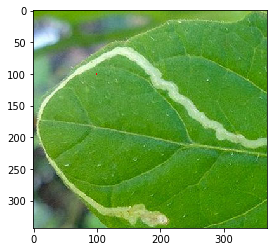

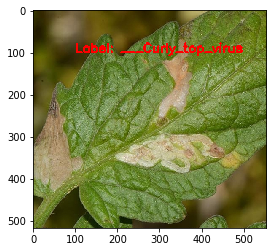

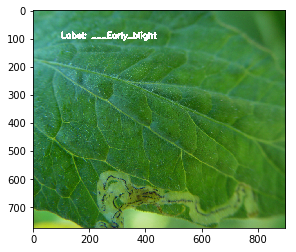

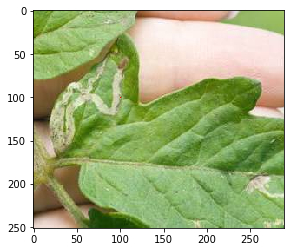

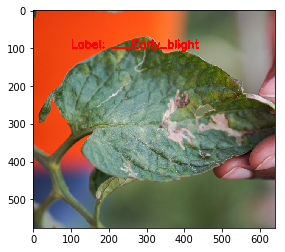

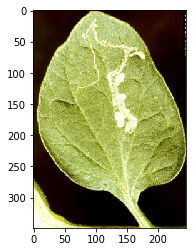

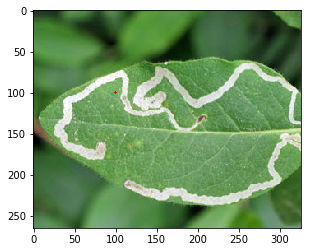

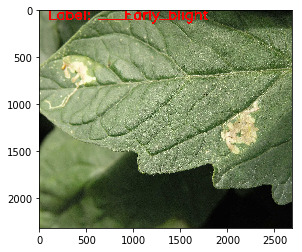

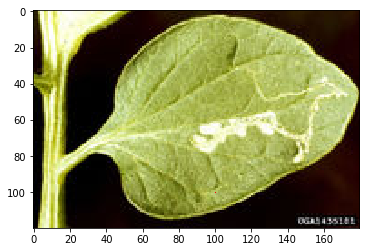

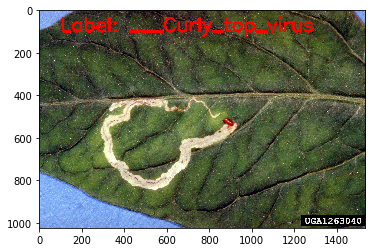

In [7]:
import cv2
import matplotlib.pyplot as plt
import time

# loop over the sample images
for (i, image_path) in enumerate(image_paths):
    # Load the example image, draw the prediction, and display it
    image = plt.imread(image_path)
    color = (0, 255, 0)
    if(predictions[i] != 3):
        color = (255, 0, 0)
        font_size = int(image.shape[1] * (0.2/100))
        font_thickness = int(image.shape[1] * (0.2/30))
        cv2.putText(image, "Label: {}".format(class_labels[predictions[i]]), (100, 100), cv2.FONT_HERSHEY_SIMPLEX, font_size, color, font_thickness)
        plt.subplots(1, 1)
        plt.imshow(image)
        print(image_path)


In [8]:
# import cv2
# import matplotlib.pyplot as plt
# import time

# # loop over the sample images
# for (i, image_path) in enumerate(image_paths):
#     # Load the example image, draw the prediction, and display it
#     image = plt.imread(image_path)
#     color = (0, 255, 0)
#     if(predictions[i] != 2):
#         color = (255, 0, 0)
#         font_size = int(image.shape[1] * (0.2/100))
#         font_thickness = int(image.shape[1] * (0.2/30))
#         x_pos = int(image.shape[0]/3)
#         y_pos = int(image.shape[1]/2)
#         image_pos = (x_pos, y_pos)
#         cv2.putText(image, "Label: {}".format(class_labels[predictions[i]]), image_pos, cv2.FONT_HERSHEY_SIMPLEX, font_size, color, font_thickness)
#         plt.subplots(1, 1)
#         plt.imshow(image)
